Initial Cost is 0.6931471805599454


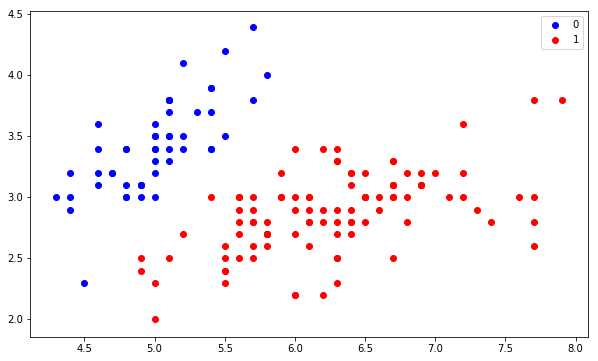

In [249]:

iris = datasets.load_iris()

iris

X = np.array(iris.data[:, :2], dtype = np.float32)
y = np.array((iris.target != 0) * 1, dtype = np.float32)


plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

[m,n] = X.shape
X = np.concatenate((np.ones((m,1)), X), axis=1) #86 left for testing
theta = np.zeros((n+1,), dtype = np.float32)


print("Initial Cost is",RegCostFunction())



08.09 - Matplot scatter was showing that the data cannot be classified with the given parameters. So if the graph cannot give a graph pattern idea, the problem cannot be solved with linear methods. 


06.09 The function got minimized, but the prediction is not working correctly. I have to check whether it has to do with the data I picked up for training. 


In [250]:
%time 
for i in range(num_iterations):
    theta = theta - alpha*CalcGradient()


print("Minimized Cost is", RegCostFunction())

print("Minimized theta:", theta)

predictions = np.zeros((m,1))

for i in range(m):
    if sigmoid(np.dot(X[i,:], theta)) >= 0.5:
       predictions[i] = 1

testing = np.zeros((m,1))

for i in range(m):
    if y[i]==predictions[i]:
        testing[i] = 1
    
match = np.count_nonzero(testing==1)

accuracy = (match/m)*100

print("Accuracy level: ", accuracy)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 15.5 µs
Minimized Cost is 0.007726855576303563
Minimized theta: [-25.96961165  12.5622445  -13.44580927]
Accuracy level:  100.0


10/09 The model is working correctly (optimized thetas are same). The example model worked at 19.5 s, so my one is way more efficient. Have to understand, how the exemplar graph is being built

TypeError: 'numpy.ndarray' object is not callable

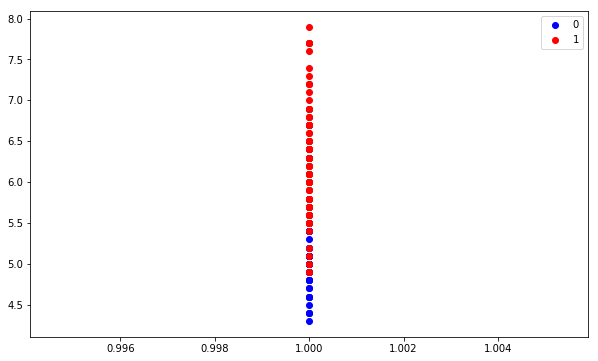

In [251]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = predictions(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


class IrisClassificator():
    
    def __init__(self, alpha = 0.03, num_iter = 100000):
        self.alpha = alpha
        self.num_iter = num_iter
        [m,n] = X.shape
        self.theta = np.zeros((n+1,), dtype = np.float32)
        
    def data_prep(self, X):
        
        return np.concatenate((np.ones((y.size,1)), X), axis=1)
    
    def pred(self):
        z = np.dot(self.data_prep(X), self.theta)
        h = self.sigmoid(z)
        return h

    def sigmoid(self, z):
        g = 1 /(1+ np.exp(-z))
        return g

    def RegCostFunction(self, y):
        J = (-y * np.log(self.pred()) - (1 - y) * np.log(1 - self.pred())).mean()
        return J
                      
    def fit(self, X, y):
        X = self.data_prep(X)
        print("Initial Cost is", self.RegCostFunction(y))
        
        
        for i in range(10):
            grad = np.dot(X.T, (self.sigmoid(self.pred()-y)))/y.size
            self.theta = self.theta - self.alpha*grad
            print(self.RegCostFunction(y))
        print("Minimized Cost is", self.RegCostFunction(y))
        print("Optimized theta:", self.theta)
        
    
                      

In [30]:
%time

iris = datasets.load_iris()

X = np.array(iris.data[:, :2], dtype = np.float32)
y = np.array((iris.target != 0) * 1, dtype = np.float32)

model = IrisClassificator(alpha=0.01, num_iter=100000)


model.fit(X,y)

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 15.5 µs
Initial Cost is 0.6931471805599454
0.7373335629508654
0.7900674180449194
0.8503941978675965
0.9173561801679223
0.9900437089880747
1.067626274429108
1.1493669854366062
1.2346252420470278
1.3228520715081624
1.4135815757144798
Minimized Cost is 1.4135815757144798
Optimized theta: [-0.04155529 -0.23576923 -0.1298224 ]
